# Homework 2

implement a Multi-layer Perceptron and train it to solve logical gatesand the XOR problem.
To do so, we will implement backpropagation ourselves. In theFlipped Classroom Session on Thursday we will prepare a Perceptron together. You can use this code and build your MLP on top of that. You can choose to do this homework in a Jupyter notebook or using different scripts(one module for each class). import numpy as np

## 1. Preparation
For  this  homework  you  will  use  sigmoid  as  an  activation  function. Think about the following questions 

* What is the purpose of an activation function in NN in general?
* What’s the advantage of e.g.  sigmoid over the step function (threshold function)?
* How does sigmoid look like (the formula as well as the graph)?
* What is the derivative of sigmoid?

Implement a function sigmoid(x)and a function sigmoidprime(x).

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def sigmoidprime(x):
    return (sigmoid(x)*(1-sigmoid(x)))


## 2. Data Set
The  training  data  set  will  consist  of  possible inputs and  their  corresponding labels.We are training the network on logical gates (and, or, not and, not or, xor = exclusive or).
We will create the inputs and labels ourselves. 

What are possible inputs to the logical gates?^1

For each of the logical gates you will need an array of labels(= the true solution that the network is supposed to output), one corresponding to each input pair.

In [3]:
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

## 3. Perceptron
Then you’ll need a function update(self, delta) which updates the parameters.  Todo so, compute the gradients for weights and bias from the error termδ.  (It was handedover when the function was called in thebackpropstepfunction of the classMLP().)Compute the gradients using:

∂L∂w(l)ij=δ(l)iaj(l−1)

And then update the parameters using:θnew=θold−α∇Lθ

In [4]:
class Perceptron:
    """Single neuron handling its own weights and bias.
    
    Attributes:
        weights"""

    def __init__(self, input_units):
        """Initialize a new neuron with its weights and bias.

        Args:
            input_units (int): Dimensionality of the data coming into this perceptron. 
                In a network of perceptrons this basically represents the 
                number of neurons in the layer before this neuron's layer. 
                Used for generating the perceptron's weights vector, which 
                not only includes one weight per input but also an additional 
                bias weight.
        """
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term.
        self.weights = np.random.randn(self.input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 1.
        self.alpha = 1
        self.inputs = 0
        self.drive = 0
        
    def forward_step(self, inputs):
        """Activate this neuron with a specific input.

        Calculate the weighted sum of inputs and apply the activation function.

        Args:
            inputs (ndarray): Vector of input values.

        Returns:
            float: A real number representing the perceptron's activation after 
            calculating the weighted sum of inputs and applying the 
            perceptron's activation function.
        """
        self.inputs = inputs
        # Perform a perceptron forward step.
        # 1. Calculate the drive using @ as a matrix multiplication command.
        self.drive =  self.weights @ inputs + self.bias 
        # alternative would be:
        # weighted_sum =  np.dot(input, self.weights) + self.bias
        # 2. Return activation, graded according to the drive by the sigmoid function.
        return sigmoid(self.drive)
        
    def update(self, delta):
        """Adapt this neuron's weights by a specific delta.

        Args:
            x (ndarray): Vector of input values.
            delta (float): Weight adaptation delta value.
        """
        # bias update. We consider 1 as the "input" to the bias, so that we can treat it just like the other weights.
        self.bias -= self.alpha * delta
        # weight updates
        self.weights -= self.alpha * delta * self.inputs

## 4. Multi-Layer Perceptron
Further,  we  will  need  a  class MLP() that  can  perform  a  forward  and  backprop-step.Initialize the MLP with 1 hidden layer that has4 Perceptrons.  Initialize1 outputneuron.7In theforwardstepprocess the inputs through the network.8In thebackpropstepupdate the parameters of the network.

In [5]:
class MLP:
    """Network of perceptrons with a single hidden layer and
       one output neuron.
    
    Attributes:
        hidden_neurons (list): List of perceptrons
        output_neuron (perceptron_object): The output perceptron
        output (int): The output {0, 1}
    """
    
    def __init__(self, dim_in, perceptron_count):
        """Initialize a new network with individual perceptron and input count.
        
        Args:
            dim_in (int): Input dimension
            perceptron_count (int): Number of perceptrons in the hidden layer
        """
        self.hidden_neurons = np.array([Perceptron(dim_in) for i in np.arange(perceptron_count)])
        self.output_neuron = Perceptron(perceptron_count)
        self.output = 0
        
    def forward_step(self, inputs):
        """Activate network.

        Args:
            x (ndarray): Vector of input values.

        """
        outputs_hidden_neurons = np.array([neuron.forward_step(inputs) for neuron in self.hidden_neurons])
        self.output = self.output_neuron.forward_step(np.reshape(outputs_hidden_neurons, newshape=(-1)))
    
    def backprop_step(self, label):
        """Adapt the whole network given an input and expected output.
        
        Args:
            label (list): List of target_labels
        """
        # calculate the error for the output neuron
        delta_out = - (label - self.output) * sigmoidprime(self.output_neuron.drive)
        # update the output-neuron's parameters
        self.output_neuron.update(delta_out)
        # calculate the errors for the hidden neurons
        deltas_hidden = [delta_out * sigmoidprime(n.drive) * self.output_neuron.weights[i] for i,n in enumerate(self.hidden_neurons)]
        for index, neuron in enumerate(self.hidden_neurons):
            neuron.update(deltas_hidden[index])

## 5. Training
As a loss function for training we will use the squared error (t−y)2.  This loss is thesigmoid output vs.  the target.  But as discussed in the lecture, we want to introduce anadditinal measurement of the performance of the network: This is the accuracy measure.While the loss compares our pro As a threshold use 0.5.  Meaning if the network outputsa value bigger than 0.5 and the target is 1, it counts as a correct classification.  If targetis 0 a correct classification will be a value smaller than 0.5 respectively.Create  an  instance  of  the  MLP  class  and  train  it  for  a  1000  epochs.   One  epoch  islooping over each point in your dataset once.  Perform a forward and backward step foreach point in the dataset and record the loss and accuracy.  For visualization you shouldkeep track of the epochs and the average loss and accuracy for each epoch.

In [6]:
# Initialize a MLP
mlp = MLP(2, 4)
# lists to store epochs, accuracies and average loss
epochs = []
accuracies = []
loss_averages = []

for i in range (1000):
    epochs.append(i)
    loss_sum = 0
    accuracy_sum = 0
    
    # randomly sample each point from the input dataset once per epoch
    # train on XOR logical gate
    for index in np.random.choice(4,size=4,replace=False):
        sample = x[index]
        target_label = t_xor[index]
        # training step
        mlp.forward_step(sample)
        mlp.backprop_step(target_label)
        # compute squared-error loss for the prediction
        loss_sum += (target_label - mlp.output)**2
        accuracy_sum += int(np.abs(target_label - mlp.output)<0.5)
    accuracies.append(accuracy_sum/4)
    loss_averages.append(loss_sum/4)

## 6. Visualization
Visualize the training progress using matplotlib.  Create one graph with the epochs onthe x-axis and the average loss per epoch on the y-axis.  Do the same for the averageaccuracy per epoch.  If your MLP trained correctly the loss should come down to zeroand the accuracy should go up to 1 in most cases.  Due to random weight initialisationthe accuracy might not reach 1 sometimes.  In that case just rerun the MLP initialisationand the training.

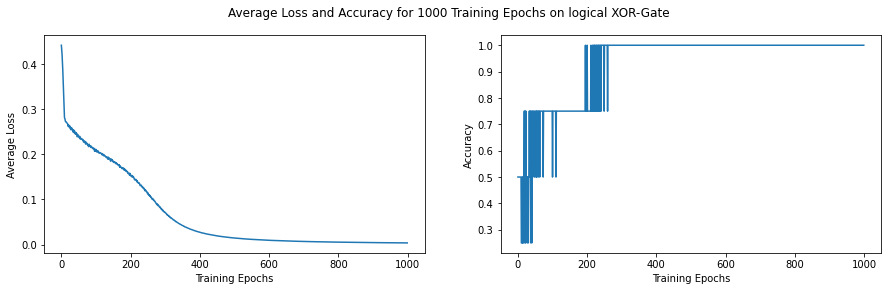

In [7]:
# first tryout  for the previously instantiated MLP after training on xor gate
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
ax[0].plot(epochs, loss_averages)
ax[0].set_xlabel("Training Epochs")
ax[0].set_ylabel("Average Loss")
ax[1].plot(epochs, accuracies)
ax[1].set_xlabel("Training Epochs")
ax[1].set_ylabel("Accuracy")
fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical XOR-Gate")
plt.show()

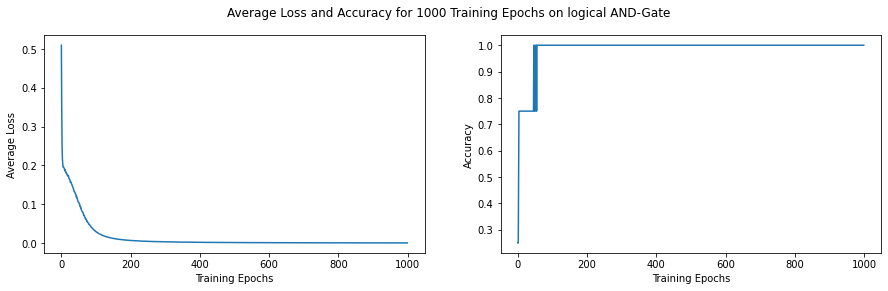

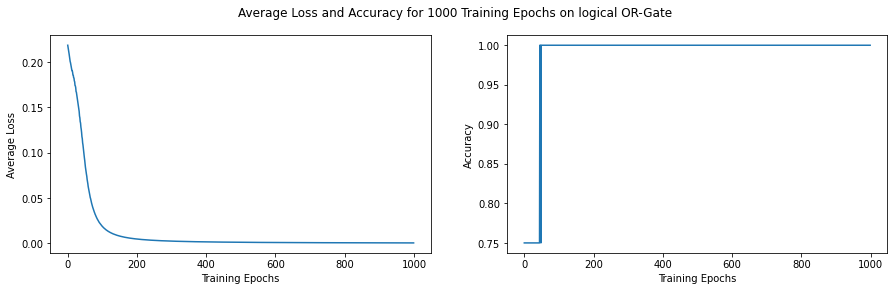

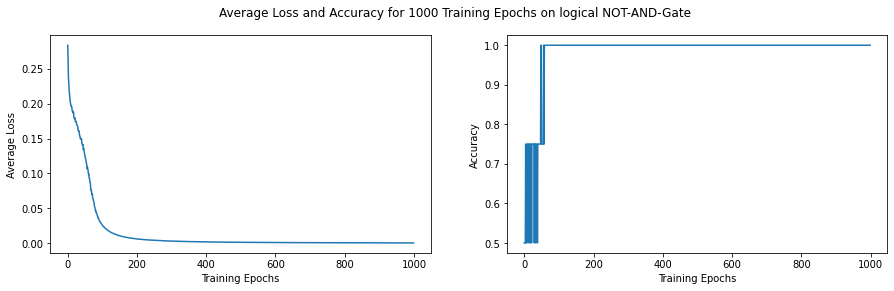

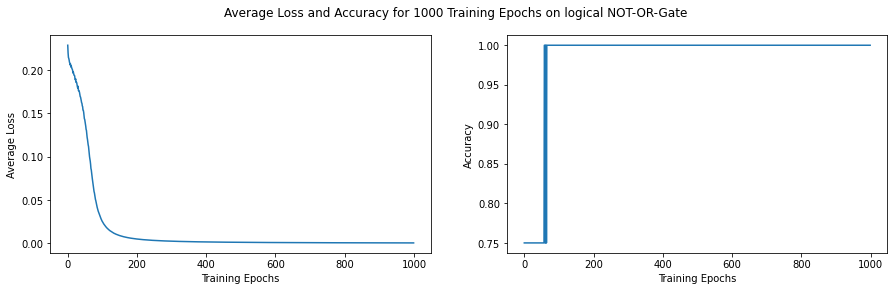

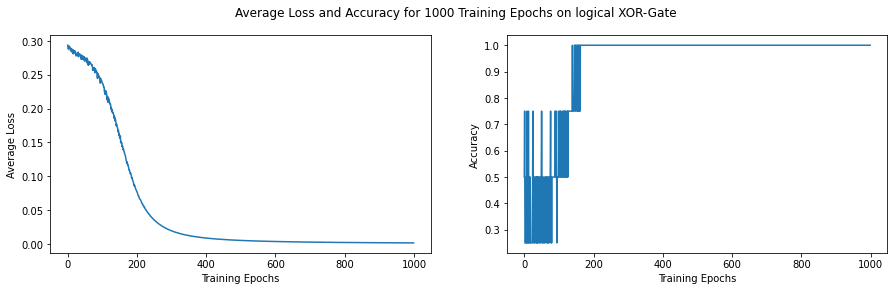

In [8]:
# now train a new MLP for each the different gates and visualize performance results
gates = [t_and,t_or,t_nand,t_nor,t_xor]
gate = 0
for targets in gates:
    mlp = MLP(2, 4)
    epochs = []
    accuracies = []
    loss_averages = []
    for i in range (1000):
        epochs.append(i)
        loss_sum = 0
        accuracy_sum = 0
        # randomly sample each point from the input dataset once per epoch
        for index in np.random.choice(4,size=4,replace=False):
            sample = x[index]
            target_label = targets[index]
            # training step
            mlp.forward_step(sample)
            mlp.backprop_step(target_label)
            # compute squared-error loss for the prediction
            loss_sum += (target_label - mlp.output)**2
            accuracy_sum += int(np.abs(target_label - mlp.output)<0.5)
        accuracies.append(accuracy_sum/4)
        loss_averages.append(loss_sum/4)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
    ax[0].plot(epochs, loss_averages)
    ax[0].set_xlabel("Training Epochs")
    ax[0].set_ylabel("Average Loss")
    ax[1].plot(epochs, accuracies)
    ax[1].set_xlabel("Training Epochs")
    ax[1].set_ylabel("Accuracy")
    if (gate == 0):
        fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical AND-Gate")
    elif (gate == 1):
        fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical OR-Gate")
    elif (gate == 2):
        fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical NOT-AND-Gate")
    elif (gate == 3):
        fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical NOT-OR-Gate")
    else:
        fig.suptitle("Average Loss and Accuracy for 1000 Training Epochs on logical XOR-Gate")
    plt.show()
    gate +=1